In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
X, y = make_circles(n_samples=1000, factor=0.4)
print (X.shape, y.shape)

(1000, 2) (1000,)


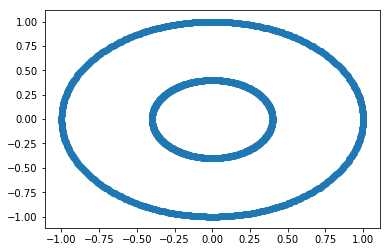

In [4]:

plt.scatter(X[:, 0], X[:, 1])
plt.show()

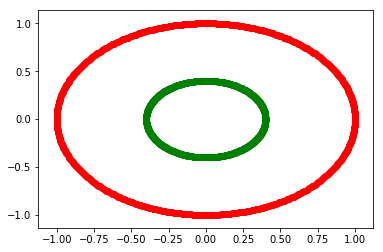

In [5]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')

plt.show()

In [7]:

Y = np_utils.to_categorical(y)
print (Y.shape)

for ix in range(10):
    print (Y[ix], "---", y[ix])

(1000, 2)
[0. 1.] --- 1
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1


In [9]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print (X_train.shape)

(800, 2)


In [10]:

## NN in keras
model = Sequential()

model.add(Dense(5,input_shape = (2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [11]:

model2 = Sequential()

model2.add(Dense(2, input_shape=(2,)))
for ix in range(5):
    model2.add(Dense(5))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:

hist = model.fit(X_train, y_train, nb_epoch=100,batch_size=100,verbose=2, shuffle=True ,validation_data=(X_test, y_test))

c:\python\python36\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 0s - loss: 0.6723 - acc: 0.5062 - val_loss: 0.6680 - val_acc: 0.5450
Epoch 2/100
 - 0s - loss: 0.6572 - acc: 0.5300 - val_loss: 0.6571 - val_acc: 0.5600
Epoch 3/100
 - 0s - loss: 0.6477 - acc: 0.5400 - val_loss: 0.6487 - val_acc: 0.5750
Epoch 4/100
 - 0s - loss: 0.6401 - acc: 0.5500 - val_loss: 0.6416 - val_acc: 0.5900
Epoch 5/100
 - 0s - loss: 0.6336 - acc: 0.5663 - val_loss: 0.6353 - val_acc: 0.5950
Epoch 6/100
 - 0s - loss: 0.6278 - acc: 0.5775 - val_loss: 0.6297 - val_acc: 0.5950
Epoch 7/100
 - 0s - loss: 0.6226 - acc: 0.5925 - val_loss: 0.6245 - val_acc: 0.6100
Epoch 8/100
 - 0s - loss: 0.6178 - acc: 0.6050 - val_loss: 0.6198 - val_acc: 0.6300
Epoch 9/100
 - 0s - loss: 0.6132 - acc: 0.6412 - val_loss: 0.6153 - val_acc: 0.6500
Epoch 10/100
 - 0s - loss: 0.6090 - acc: 0.6613 - val_loss: 0.6110 - val_acc: 0.6750
Epoch 11/100
 - 0s - loss: 0.6050 - acc: 0.6938 - val_loss: 0.6070 - val_acc: 0.6750
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.4120 - acc: 1.0000 - val_loss: 0.4113 - val_acc: 1.0000
Epoch 98/100
 - 0s - loss: 0.4104 - acc: 1.0000 - val_loss: 0.4097 - val_acc: 1.0000
Epoch 99/100
 - 0s - loss: 0.4089 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 1.0000
Epoch 100/100
 - 0s - loss: 0.4073 - acc: 1.0000 - val_loss: 0.4066 - val_acc: 1.0000
